In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import * 
from rates import *
from lightcurves import *

In [3]:
data = np.load('./local-tester/products/ia.npz', allow_pickle=True)
redshifts = data['redshifts']
metric_tracker = data['metric_tracker']
metric_list = data['metric_list']
print(metric_list)

{'snr10': (<function snr at 0x132657eb0>, (10, 5)), 'detect': (<function snr at 0x132657eb0>, (2, 5)), 'afterexp': (<function after_exp at 0x1326b03a0>, (3, 2, 5)), 'snr5': (<function snr at 0x132657eb0>, (5, 5)), 'snr-r-3': (<function snr_one_filt at 0x1326b0040>, ('g', 3, 5)), 'rise3': (<function during_rise at 0x1326b0160>, (3,)), 'fall3': (<function during_fall at 0x1326b01f0>, (3,)), 'brighterthan23p5-3': (<function brighter_than_mag at 0x1326b0280>, (23.5, 5, 3)), 'brighterthan23-3': (<function brighter_than_mag at 0x1326b0280>, (23, 5, 3)), 'brighterthan22p5-3': (<function brighter_than_mag at 0x1326b0280>, (22.5, 5, 3)), 'brighterthan22-3': (<function brighter_than_mag at 0x1326b0280>, (22, 5, 3)), 'brighterthan21p5-3': (<function brighter_than_mag at 0x1326b0280>, (21.5, 5, 3)), 'brighterthan21-3': (<function brighter_than_mag at 0x1326b0280>, (21, 5, 3)), 'brighterthan20p5-3': (<function brighter_than_mag at 0x1326b0280>, (20.5, 5, 3)), 'brighterthan20-3': (<function brighter

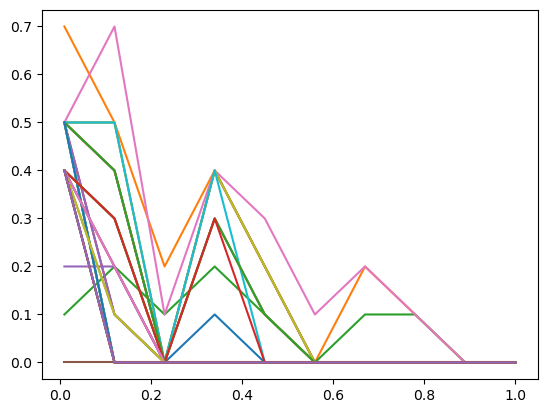

In [4]:
efficiencies = calc_efficiences(metric_tracker)
plt.plot(redshifts, efficiencies)
plt.show()

10
[1.84272077e+05 7.75966671e+05 4.75526800e+05 2.87828343e+05
 8.58929279e+03 0.00000000e+00 9.28296719e+05 2.92108925e+05
 2.92108925e+05 1.65698138e+05 5.32488766e+04 1.71926503e+04
 1.71926503e+04 4.35090511e+03 4.35090511e+03 7.03233922e+01
 7.03233922e+01 7.03233922e+01 7.03233922e+01 7.03233922e+01
 7.03233922e+01 1.84272077e+05 1.84272077e+05 1.21066683e+05
 8.61742215e+03 8.61742215e+03 8.61742215e+03 4.33684043e+03
 4.33684043e+03 5.62587137e+01 5.62587137e+01 5.62587137e+01
 5.62587137e+01 5.62587137e+01 5.62587137e+01] 1 / rad2


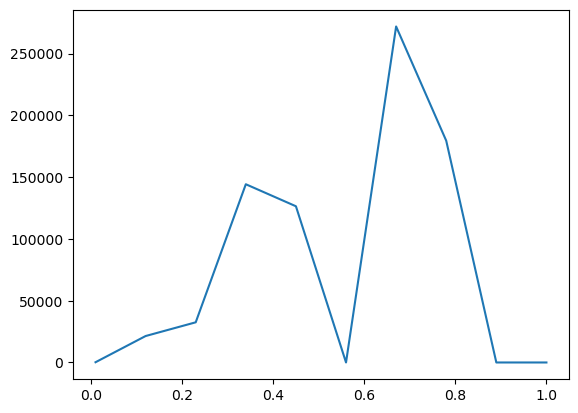

In [7]:
def rate_strolger(z):
	"""
	From https://iopscience.iop.org/article/10.1088/0004-637X/813/2/93/pdf
	Eqn 9
	"""
	A = 0.015
	B = 1.5
	C = 5.0 
	D = 6.1
	k = 0.006
	rate = 1e9 * k * A * (1 + z)**C / (((1 + z)/B)**D + 1)
	return rate

print(len(redshifts))
# that 0.04 is the percent from the CCSN population

#integrand, total_rate = calc_rate(redshifts, efficiencies, rate_strolger, rate_z0=0.04)
integrand, total_rate = calc_rate(redshifts, efficiencies, kessler_ia)
dz = redshifts[1] - redshifts[0];
plt.plot(redshifts, dz * integrand.value[:,1] * 1e-9)
print(total_rate)
#plt.plot(redshifts, integrand)

In [6]:
# Calculate a new metric, using the light curves
# Do not use this box!!!! IT calculates a fraction that is not quite right
def snr(lc, num=10, sigma=5):
    snr_count = np.sum(lc.snrs>sigma)
    if snr_count < num:
        return 0
    else:
        return 1

lcs = np.load('./products/lcs.npz', allow_pickle=True)['lcs']
all_true = 0
for lc in lcs:
    all_true = all_true + snr(lc)
print(all_true / len(lcs))

0.009636767976278725
